In [1]:
# Imports
import json
import pandas as pd
import numpy as np
import mplfinance as mpf

from datetime import datetime

%matplotlib inline

In [2]:
with open('../dump/XAU_USD-H1-candles.json') as f:
    raw_json_data = f.read()

json_data = json.loads(raw_json_data)

instrument = json_data['instrument']
granularity = json_data['granularity']
candles = json_data['candles']

print(f"{instrument} ({granularity}) candles")
print(f"Sample candle data: {candles[0]}")

XAU_USD (H1) candles
Sample candle data: {'complete': True, 'volume': 6975, 'time': '2022-04-29T04:00:00.000000000Z', 'mid': {'o': '1904.405', 'h': '1906.010', 'l': '1903.539', 'c': '1905.895'}}


In [3]:
# Convert json data to dataframe
flatten_data = [
    [ 
        datetime.strptime(x['time'], "%Y-%m-%dT%H:%M:%S.%f000Z"), 
        bool(x['complete']), 
        int(x['volume']), 
        float(x['mid']['o']), 
        float(x['mid']['h']), 
        float(x['mid']['l']), 
        float(x['mid']['c'])
    ] for x in candles]
df = pd.DataFrame(
    flatten_data, 
    columns=['time','complete', 'Volume', 'Open', 'High', 'Low', 'Close'])

print(f"df shape: {df.shape}")

print(df.info())

df shape: (500, 7)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   time      500 non-null    datetime64[ns]
 1   complete  500 non-null    bool          
 2   Volume    500 non-null    int64         
 3   Open      500 non-null    float64       
 4   High      500 non-null    float64       
 5   Low       500 non-null    float64       
 6   Close     500 non-null    float64       
dtypes: bool(1), datetime64[ns](1), float64(4), int64(1)
memory usage: 24.1 KB
None


In [4]:
df['ma4'] = df['Close'].rolling(4).mean()
df['ma12'] = df['Close'].rolling(12).mean()
df['ewm4'] = df['Close'].ewm(span=4, adjust=False).mean()
df['ewm12'] = df['Close'].ewm(span=12, adjust=False).mean()
df.head(30)

,time,complete,Volume,Open,High,Low,Close,ma4,ma12,ewm4,ewm12
0,2022-04-29 04:00:00,True,6975,1904.405,1906.010,1903.539,1905.895,NaN,NaN,1905.895000,1905.895000
1,2022-04-29 05:00:00,True,15075,1905.870,1908.405,1905.545,1907.015,NaN,NaN,1906.343000,1906.067308
2,2022-04-29 06:00:00,True,25119,1907.040,1912.939,1906.237,1911.545,NaN,NaN,1908.423800,1906.910030
3,2022-04-29 07:00:00,True,28926,1911.550,1917.920,1910.080,1917.310,1910.44125,NaN,1911.978280,1908.510025
4,2022-04-29 08:00:00,True,13388,1917.290,1917.515,1912.969,1913.915,1912.44625,NaN,1912.752968,1909.341560
5,2022-04-29 09:00:00,True,13417,1913.925,1917.045,1913.180,1914.775,1914.38625,NaN,1913.561781,1910.177474
6,2022-04-29 10:00:00,True,8932,1914.760,1917.845,1914.433,1915.100,1915.27500,NaN,1914.177068,1910.934785
7,2022-04-29 11:00:00,True,13753,1915.145,1919.980,1914.175,1919.610,1915.85000,NaN,1916.350241,1912.269434
8,2022-04-29 12:00:00,True,59258,1919.611,1919.886,1907.553,1910.895,1915.09500,NaN,1914.168145,1912.057982
9,2022-04-29 13:00:00,True,66801,1910.905,1913.627,1902.640,1911.000,1914.15125,NaN,1912.900887,1911.895216


In [5]:
# Set styles 
#  mpf.available_styles()
# Color reference: https://matplotlib.org/stable/gallery/color/named_colors.html

mc = mpf.make_marketcolors(
    up='g', down='r',
    edge='lime',
    wick={'up':'blue','down':'orange'},
    volume='gray',
    ohlc='black')

s  = mpf.make_mpf_style(
    base_mpf_style='charles',
    mavcolors=['fuchsia','g','r'],
    #mavcolors=['#1f77b4','#ff7f0e','#2ca02c'],
    #marketcolors=mc
    )

dfx = df.tail(50).set_index('time')


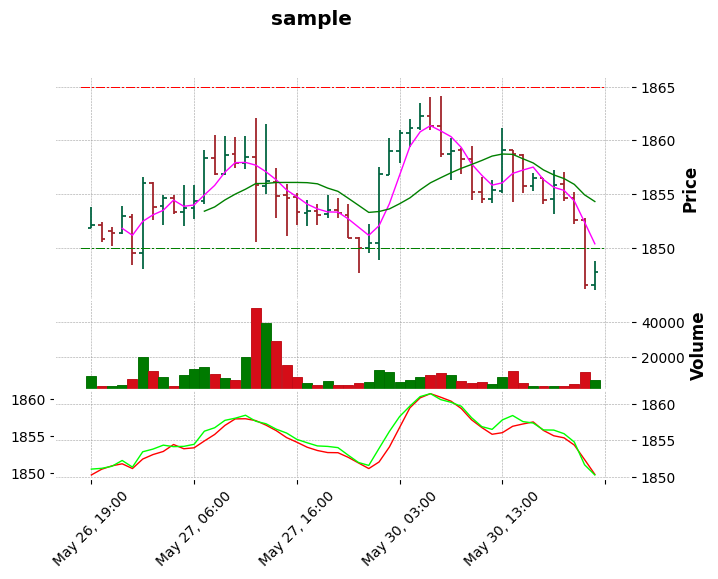

In [6]:

ap0 = [ 
    mpf.make_addplot(dfx['ma4'],color='r', width=1, panel=2),  # uses panel 0 by default
    mpf.make_addplot(dfx['ewm4'],color='lime', width=1, panel=2),  # uses panel 0 by default
    #mpf.make_addplot(dfx['Volume'],type='line',color='lime', linestyle=' ',panel =1, mav = (4, 12))
    ]

mpf.plot(dfx, type='ohlc',
    mav=(4, 12),
    volume=True, 
    addplot=ap0, 
    style=s, 
    hlines=dict(hlines=[1850,1865],colors=['g','r'],linestyle='-.',linewidths=(1,1)),
    title="sample", 
    linecolor='indigo', update_width_config=dict(line_width=1))

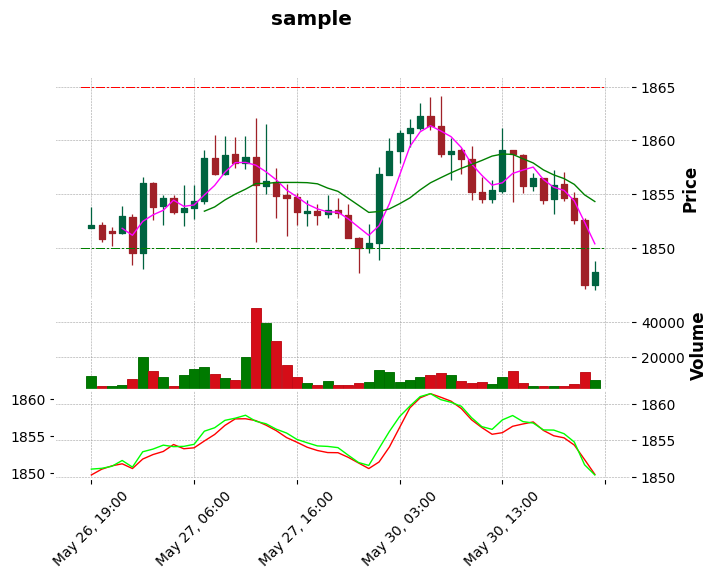

In [7]:
ap0 = [ 
    mpf.make_addplot(dfx['ma4'],color='r', width=1, panel=2),  # uses panel 0 by default
    mpf.make_addplot(dfx['ewm4'],color='lime', width=1, panel=2),  # uses panel 0 by default
    #mpf.make_addplot(dfx['Volume'],type='line',color='lime', linestyle=' ',panel =1, mav = (4, 12))
    ]

mpf.plot(dfx, type='candle',
    mav=(4, 12),
    volume=True, 
    addplot=ap0, 
    style=s, 
    hlines=dict(hlines=[1850,1865],colors=['g','r'],linestyle='-.',linewidths=(1,1)),
    title="sample", 
    linecolor='indigo', update_width_config=dict(line_width=1))

In [13]:
df
dfx2 = df.head(20).set_index('time')

ap0 = [ 
    mpf.make_addplot(dfx2['ma4'],color='r', width=1, panel=2),  # uses panel 0 by default
    mpf.make_addplot(dfx2['ewm4'],color='lime', width=1, panel=2),  # uses panel 0 by default
    #mpf.make_addplot(dfx['Volume'],type='line',color='lime', linestyle=' ',panel =1, mav = (4, 12))
    ]

mpf.plot(dfx2, type='candle',
    mav=(4, 12),
    volume=True, 
    addplot=ap0, 
    style=s, 
    hlines=dict(hlines=[1850,1865],colors=['g','r'],linestyle='-.',linewidths=(1,1)),
    title="sample", 
    linecolor='indigo', update_width_config=dict(line_width=1))

AttributeError: 'DataFrame' object has no attribute 'skiprows'